# 4章 データの表現と特徴量エンジニアリング

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

## 4.1 カテゴリ変数
### 4.1.1 ワンホットエンコーディング (ダミー変数)

In [2]:
import os
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(adult_path, header=None, index_col=False,
                  names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "gender", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"])

data = data[["age", "workclass", "education", "gender", "hours-per-week", "occupation", "income"]]
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


#### 4.1.1.1 文字列で表されているカテゴリデータのチェック

In [3]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [4]:
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [5]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [6]:
features = data_dummies.loc[:, "age":"occupation_ Transport-moving"]
x = features.values
y = data_dummies["income_ >50K"].values
print("x.shape: {} y.shape: {}".format(x.shape, y.shape))

x.shape: (32561, 44) y.shape: (32561,)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
print("Test score: {:.2f}".format(logreg.score(x_test, y_test)))

Test score: 0.81


### 4.1.2 数値でエンコードされているカテゴリ

In [8]:
demo_df = pd.DataFrame({"Integer Feature": [0, 1, 2, 1], "Categorical Feature": ["socks", "fox", "socks", "box"]})
display(demo_df)

,Categorical Feature,Integer Feature
0,socks,0
1,fox,1
2,socks,2
3,box,1


In [9]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [10]:
demo_df["Integer Feature"] = demo_df["Integer Feature"].astype(str)
pd.get_dummies(demo_df, columns=["Integer Feature", "Categorical Feature"])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


## 4.2 ビニング、離散化、線形モデル、決定木

/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


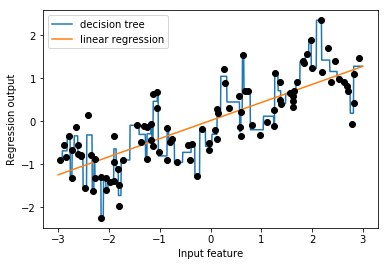

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

x, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(x, y)
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(x, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(x[:, 0], y, "o", c="k")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [12]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

which_bin = np.digitize(x, bins=bins)
print("\nData points:\n", x[:5])
print("\nBin membership for data points:\n", which_bin[:5])

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]

Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [13]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
x_binned = encoder.transform(which_bin)
print(x_binned[:5])

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [14]:
print("x_binned.shape: {}".format(x_binned.shape))

x_binned.shape: (100, 10)


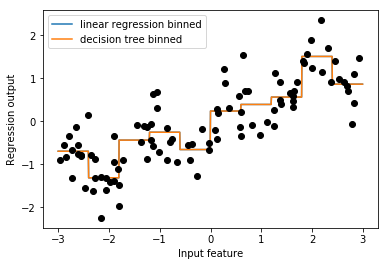

In [15]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(x_binned, y)
plt.plot(line, reg.predict(line_binned), label="linear regression binned")

reg = DecisionTreeRegressor(min_samples_split=3).fit(x_binned, y)
plt.plot(line, reg.predict(line_binned), label="decision tree binned")

plt.plot(x[:, 0], y, "o", c="k")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

## 4.3 交互作用と多項式

In [16]:
x_combined = np.hstack([x, x_binned])
print(x_combined.shape)

(100, 11)


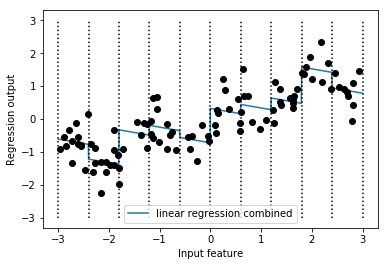

In [17]:
reg = LinearRegression().fit(x_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label="linear regression combined")

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ":", c="k")

plt.plot(x[:, 0], y, "o", c="k")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [18]:
x_product = np.hstack([x_binned, x * x_binned])
print(x_product.shape)

(100, 20)


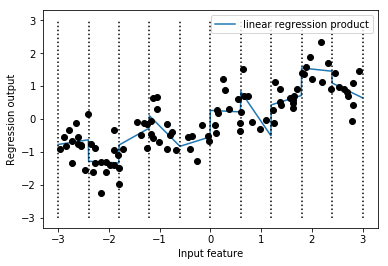

In [19]:
reg = LinearRegression().fit(x_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label="linear regression product")

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ":", c="k")

plt.plot(x[:, 0], y, "o", c="k")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(x)
x_poly = poly.transform(x)
print("x_poly.shape: {}".format(x_poly.shape))

print("Entries of x: \n{}".format(x[:5]))
print("Entries of x_poly: \n{}".format(x_poly[:5]))

x_poly.shape: (100, 10)
Entries of x: 
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of x_poly: 
[[ -7.52759287e-01   5.66646544e-01  -4.26548448e-01   3.21088306e-01
   -2.41702204e-01   1.81943579e-01  -1.36959719e-01   1.03097700e-01
   -7.76077513e-02   5.84199555e-02]
 [  2.70428584e+00   7.31316190e+00   1.97768801e+01   5.34823369e+01
    1.44631526e+02   3.91124988e+02   1.05771377e+03   2.86036036e+03
    7.73523202e+03   2.09182784e+04]
 [  1.39196365e+00   1.93756281e+00   2.69701700e+00   3.75414962e+00
    5.22563982e+00   7.27390068e+00   1.01250053e+01   1.40936394e+01
    1.96178338e+01   2.73073115e+01]
 [  5.91950905e-01   3.50405874e-01   2.07423074e-01   1.22784277e-01
    7.26822637e-02   4.30243318e-02   2.54682921e-02   1.50759786e-02
    8.92423917e-03   5.28271146e-03]
 [ -2.06388816e+00   4.25963433e+00  -8.79140884e+00   1.81444846e+01
   -3.74481869e+01   7.72888694e+01  -1.59515582e+02   3.29222321e+02
   -6.79478050e+0

In [21]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


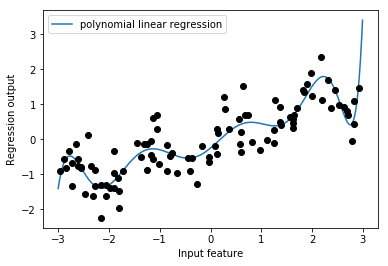

In [22]:
reg = LinearRegression().fit(x_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label="polynomial linear regression")

plt.plot(x[:, 0], y, "o", c="k")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

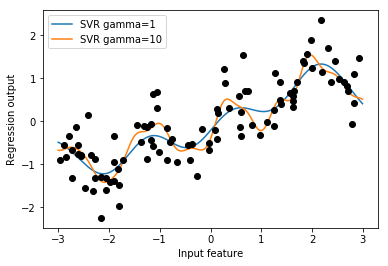

In [23]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(x, y)
    plt.plot(line, svr.predict(line), label="SVR gamma={}".format(gamma))
    
plt.plot(x[:, 0], y, "o", c="k")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [24]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

poly = PolynomialFeatures(degree=2).fit(x_train_scaled)
x_train_poly = poly.transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)

print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [25]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(x_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(ridge.score(x_test_scaled, y_test)))
ridge = Ridge().fit(x_train_poly, y_train)
print("Score with interactions: {:.3f}".format(ridge.score(x_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


In [26]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100).fit(x_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(rf.score(x_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100).fit(x_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(x_test_poly, y_test)))


Score without interactions: 0.801
Score with interactions: 0.761


## 4.4 単変量非線形変換

In [27]:
rnd = np.random.RandomState(0)
x_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
x = rnd.poisson(10 * np.exp(x_org))
y = np.dot(x_org, w)

print("Number of feature appearances:\n{}".format(np.bincount(x[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9 17
  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5  2  1
  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1  0  2  0
  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0  0  0  0  0
  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5,0,'Value')

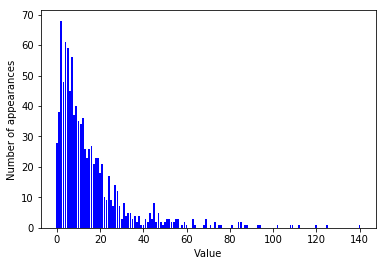

In [28]:
bins = np.bincount(x[:, 0])
plt.bar(range(len(bins)), bins, color="b")
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [29]:
from sklearn.linear_model import Ridge

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
score = Ridge().fit(x_train, y_train).score(x_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


(array([ 19.,   0.,   0.,  31.,   0.,  56.,   0.,  37.,  41.,  44.,  67.,
         29.,  82.,  50.,  60.,  65.,  48.,  32.,  23.,  21.,  19.,   7.,
          7.,   8.,   4.]),
 array([ 0.        ,  0.19183162,  0.38366324,  0.57549487,  0.76732649,
         0.95915811,  1.15098973,  1.34282135,  1.53465297,  1.7264846 ,
         1.91831622,  2.11014784,  2.30197946,  2.49381108,  2.68564271,
         2.87747433,  3.06930595,  3.26113757,  3.45296919,  3.64480081,
         3.83663244,  4.02846406,  4.22029568,  4.4121273 ,  4.60395892,
         4.79579055]),
 <a list of 25 Patch objects>)

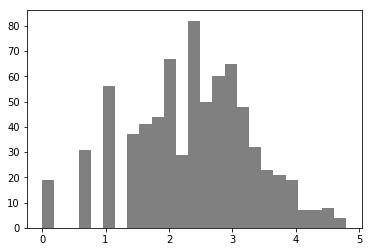

In [30]:
x_train_log = np.log(x_train + 1)
x_test_log = np.log(x_test + 1)

plt.hist(x_train_log[:, 0], bins=25, color="gray")

In [31]:
score = Ridge().fit(x_train_log, y_train).score(x_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


## 4.5 自動特徴量選択
### 4.5.1 単変量統計

In [34]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
x_w_noise = np.hstack([cancer.data, noise])

x_train, x_test, y_train, y_test = train_test_split(x_w_noise, cancer.target, random_state=0, test_size=.5)

select = SelectPercentile(percentile=50)
select.fit(x_train, y_train)
x_train_selected = select.transform(x_train)

print("x_train.shape: {}".format(x_train.shape))
print("x_train_selected.shape: {}".format(x_train_selected.shape))

x_train.shape: (284, 80)
x_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5,0,'Samle Index')

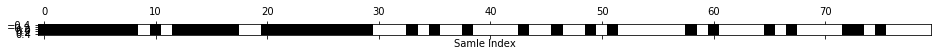

In [35]:
mask = select.get_support()
print(mask)

plt.matshow(mask.reshape(1, -1), cmap="gray_r")
plt.xlabel("Samle Index")

In [37]:
from sklearn.linear_model import LogisticRegression

x_test_selected = select.transform(x_test)

lr = LogisticRegression()
lr.fit(x_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(x_test, y_test)))
lr.fit(x_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(lr.score(x_test_selected, y_test)))

Score with all features: 0.930
Score with only selected features: 0.940


### 4.5.2 モデルベース特徴量

Text(0.5,0,'Samle Index')

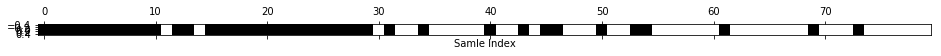

In [38]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")

select.fit(x_train, y_train)
x_train_l1 = select.transform(x_train)

mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap="gray_r")
plt.xlabel("Samle Index")

In [39]:
x_test_l1 = select.transform(x_test)
score = LogisticRegression().fit(x_train_l1, y_train).score(x_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


### 4.5.3 反復特徴量選択

Text(0.5,0,'Samle Index')

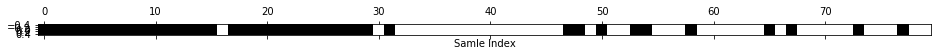

In [40]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)

select.fit(x_train, y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap="gray_r")
plt.xlabel("Samle Index")

In [42]:
x_train_rfe = select.transform(x_train)
x_test_rfe = select.transform(x_test)

score = LogisticRegression().fit(x_train_rfe, y_train).score(x_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


## 4.6 専門家知識の利用

In [44]:
citibike = mglearn.datasets.load_citibike()

print("Citi Bike data: \n{}".format(citibike.head()))

Citi Bike data: 
starttime
2015-08-01 00:00:00     3.0
2015-08-01 03:00:00     0.0
2015-08-01 06:00:00     9.0
2015-08-01 09:00:00    41.0
2015-08-01 12:00:00    39.0
Freq: 3H, Name: one, dtype: float64


Text(0,0.5,'Rentals')

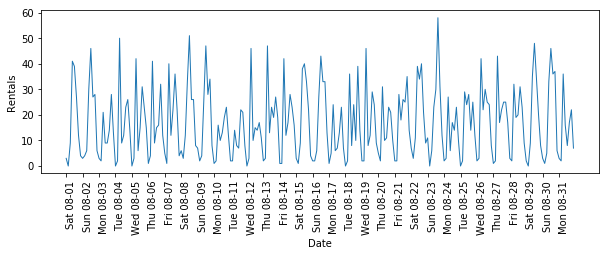

In [47]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq="D")
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

In [49]:
y = citibike.values
x = np.array(citibike.index.astype("int64").tolist()).reshape(-1, 1)

n_train = 184

def eval_on_features(features, target, regressor):
    x_train, x_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(x_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(x_test, y_test)))
    y_pred = regressor.predict(x_test)
    y_pred_train = regressor.predict(x_train)
    plt.figure(figsize=(10, 3))
    
    plt.xticks(range(0, len(x), 8), xticks.strftime("%a %m-%d"), rotation=90, ha="left")
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, "-", label="test")
    plt.plot(range(n_train), y_pred_train, "--", label="prediction train")
    
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, "--", label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test-set R^2: -0.04


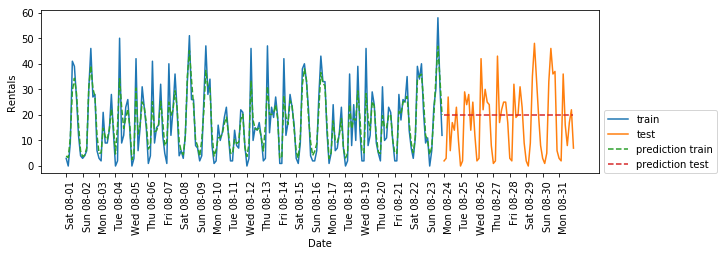

In [50]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_features(x, y, regressor)

Test-set R^2: 0.60


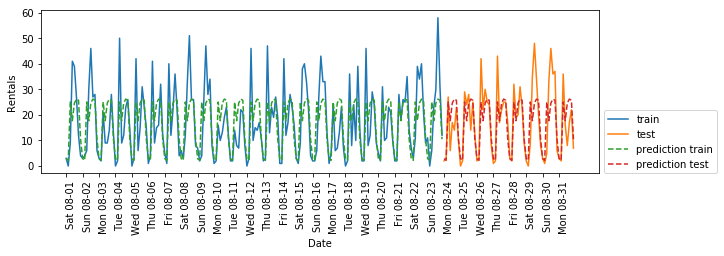

In [53]:
x_hour = np.array(citibike.index.hour.tolist()).reshape(-1, 1)
eval_on_features(x_hour, y, regressor)

Test-set R^2: 0.84


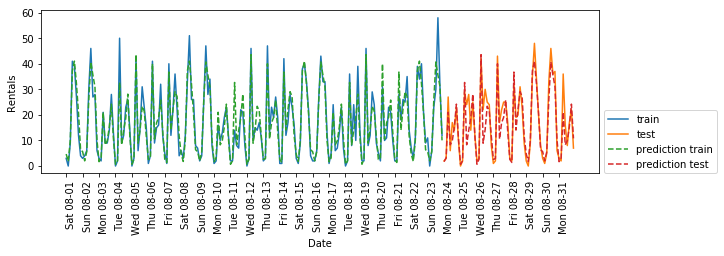

In [54]:
x_hour_week = np.hstack([np.array(citibike.index.dayofweek.tolist()).reshape(-1, 1), x_hour])
eval_on_features(x_hour_week, y, regressor)

Test-set R^2: 0.13


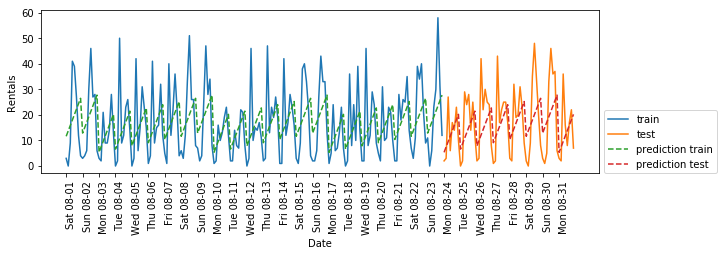

In [56]:
from sklearn.linear_model import LinearRegression
eval_on_features(x_hour_week, y, LinearRegression())

Test-set R^2: 0.62


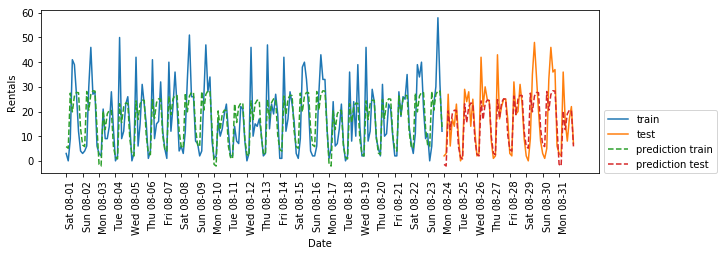

In [57]:
enc = OneHotEncoder()
x_hour_week_onehot = enc.fit_transform(x_hour_week).toarray()
eval_on_features(x_hour_week_onehot, y, Ridge())

Test-set R^2: 0.85


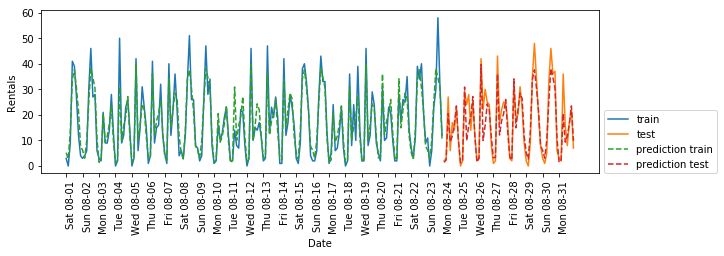

In [58]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
x_hour_week_onehot_poly = poly_transformer.fit_transform(x_hour_week_onehot)
lr = Ridge()
eval_on_features(x_hour_week_onehot_poly, y, lr)

Text(0,0.5,'Feature magnitude')

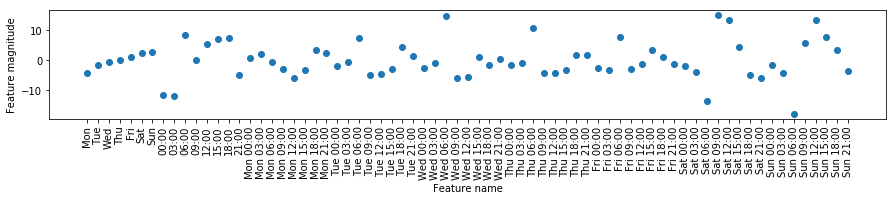

In [61]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour

features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, "o")
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")